In [5]:
#!conda info

In [132]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import re

In [133]:
#Current working directory

In [134]:
pwd

'C:\\Users\\asus\\Desktop\\datasciencepr'

In [135]:
#Importing the datasets from the local storage
train14=pd.read_csv("./Id_Interactive_Movement_Map/2020-04-14.csv")
train15=pd.read_csv("./Id_Interactive_Movement_Map/2020-04-15.csv")
train16=pd.read_csv("./Id_Interactive_Movement_Map/2020-04-16.csv")
train17=pd.read_csv("./Id_Interactive_Movement_Map/2020-04-17.csv")
train18=pd.read_csv("./Id_Interactive_Movement_Map/2020-04-18.csv")
train19=pd.read_csv("./Id_Interactive_Movement_Map/2020-04-19.csv")
train20=pd.read_csv("./Id_Interactive_Movement_Map/2020-04-20.csv")
train21=pd.read_csv("./Id_Interactive_Movement_Map/2020-04-21.csv")
train22=pd.read_csv("./Id_Interactive_Movement_Map/2020-04-22.csv")
train23=pd.read_csv("./Id_Interactive_Movement_Map/2020-04-23.csv")


In [136]:
#concatinating the datasets
train=pd.concat([train14,train15,train16,train17,train18,train19,train20,train21,train22,train23])

In [137]:
train.head(12)

,utc_date,time,crisis_name,start_polygon_id,start_polygon_names,start_x,start_y,start_name_stack,end_polygon_id,end_polygon_names,end_x,end_y,end_name_stack,length_km,metric_name,metric_value,level,tile_size,country
0,2020-04-14,16:00,tunisia_coronavirus_disease_prevention_map_apr...,317,Tébessa,7.832302,34.992387,Tébessa,308,Oum el Bouaghi,7.080806,35.828435,Oum el Bouaghi,3.981896,n_baseline,NaN,LEVEL3,13,DZ
1,2020-04-14,16:00,tunisia_coronavirus_disease_prevention_map_apr...,317,Tébessa,7.832302,34.992387,Tébessa,308,Oum el Bouaghi,7.080806,35.828435,Oum el Bouaghi,3.981896,n_crisis,NaN,LEVEL3,13,DZ
2,2020-04-14,16:00,tunisia_coronavirus_disease_prevention_map_apr...,317,Tébessa,7.832302,34.992387,Tébessa,308,Oum el Bouaghi,7.080806,35.828435,Oum el Bouaghi,3.981896,n_difference,NaN,LEVEL3,13,DZ
3,2020-04-14,16:00,tunisia_coronavirus_disease_prevention_map_apr...,317,Tébessa,7.832302,34.992387,Tébessa,308,Oum el Bouaghi,7.080806,35.828435,Oum el Bouaghi,3.981896,percent_change,-16.666667,LEVEL3,13,DZ
4,2020-04-14,16:00,tunisia_coronavirus_disease_prevention_map_apr...,317,Tébessa,7.832302,34.992387,Tébessa,308,Oum el Bouaghi,7.080806,35.828435,Oum el Bouaghi,3.981896,z_score,-0.208656,LEVEL3,13,DZ
5,2020-04-14,16:00,tunisia_coronavirus_disease_prevention_map_apr...,295,El Tarf,8.143519,36.711610,El Tarf,295,El Tarf,8.143519,36.711610,El Tarf,0.088087,n_baseline,7059.600000,LEVEL3,13,DZ
6,2020-04-14,16:00,tunisia_coronavirus_disease_prevention_map_apr...,295,El Tarf,8.143519,36.711610,El Tarf,295,El Tarf,8.143519,36.711610,El Tarf,0.088087,n_crisis,7443.000000,LEVEL3,13,DZ
7,2020-04-14,16:00,tunisia_coronavirus_disease_prevention_map_apr...,295,El Tarf,8.143519,36.711610,El Tarf,295,El Tarf,8.143519,36.711610,El Tarf,0.088087,n_difference,383.400000,LEVEL3,13,DZ
8,2020-04-14,16:00,tunisia_coronavirus_disease_prevention_map_apr...,295,El Tarf,8.143519,36.711610,El Tarf,295,El Tarf,8.143519,36.711610,El Tarf,0.088087,percent_change,5.430133,LEVEL3,13,DZ
9,2020-04-14,16:00,tunisia_coronavirus_disease_prevention_map_apr...,295,El Tarf,8.143519,36.711610,El Tarf,295,El Tarf,8.143519,36.711610,El Tarf,0.088087,z_score,0.780773,LEVEL3,13,DZ


In [138]:
#only the tunisia values (There are also DZ a>nd Libya values in the dataset)
train=train[train.country == 'TN']
train.shape

(122515, 19)

In [139]:
#Dropping columns with constant value
train.drop(['level','crisis_name','country'], axis=1,inplace=True)

In [140]:
#dropping null values 
train.dropna(inplace=True)
train.shape


(88579, 16)

In [141]:
#n_baseline : movement before the coronavirus outbreak 
#n_crisis : movement during the corona virus outbreak 
trainoriginal=train.copy()
# we are going to focus on analysing the data of the movement during the virus outbreak 
train=train[train['metric_name']=='n_crisis']
train.shape


(13191, 16)

<font size="6">There are two types of movement : </font>


<font size="4">1/ Movement within one region
for example the person involved moves from Arianna to Arianna and doesn't go to another region
for this we need to calculate the regions in which the considered distance between starting location and ending location 
is equal to 0
   


In [142]:
#Calculating the distance between the ending and starting locations
import numpy
train['distance']=numpy.sqrt((train['start_x']-train['end_x'])**2+(train['start_y']-train['end_y'])**2)
train.shape
#Working on the intra-region movement zones
train=train[train["distance"]==0]
train.shape

(6600, 17)

In [143]:
#Calucalting the average number of people who moved in a region per time slot (a time slot is 8 hours)+grouping the results per region
tab1=train.groupby('start_name_stack')['metric_value'].mean().reset_index(name='mean_per_region') #reset_index():from groupby_Object to dataframe object
#tab1.head()
#tab1.shape

t3=pd.merge(tab1,train,on='start_name_stack',how='left')
#t3.head()
#t3.shape

trainreg=t3.drop_duplicates(subset=['start_name_stack'])
#trainreg.shape
#trainreg.head(10)

#now we have the average number of people who moved per region per time stamp , 1 timestamp x 3 = 1 day 
#number of people who moved per region per day : 
trainreg['mean_per_region']=3*trainreg['mean_per_region'] 


#the time and date columns have no significations now so we are going to drop them 
trainreg.drop(['time','utc_date','metric_value'], axis=1,inplace=True)

trainreg.head(10)



C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,start_name_stack,mean_per_region,start_polygon_id,start_polygon_names,start_x,start_y,end_polygon_id,end_polygon_names,end_x,end_y,end_name_stack,length_km,metric_name,tile_size,distance
0,Ariana // Ariana,24467.0,962181,Ariana,10.169559,36.864845,962181,Ariana,10.169559,36.864845,Ariana // Ariana,0.000000,n_crisis,13,0.0
30,Ariana // Ettadhamen Mnihla,13284.7,962185,Ettadhamen Mnihla,10.111115,36.860840,962185,Ettadhamen Mnihla,10.111115,36.860840,Ariana // Ettadhamen Mnihla,0.012102,n_crisis,13,0.0
60,Ariana // Kalaât El Andalous,2636.8,962183,Kalaât El Andalous,10.131391,37.015642,962183,Kalaât El Andalous,10.131391,37.015642,Ariana // Kalaât El Andalous,0.018283,n_crisis,13,0.0
90,Ariana // Raoued,19355.1,962186,Raoued,10.197746,36.924815,962186,Raoued,10.197746,36.924815,Ariana // Raoued,0.009745,n_crisis,13,0.0
120,Ariana // Sidi Thabet,1825.6,962184,Sidi Thabet,10.045749,36.909105,962184,Sidi Thabet,10.045749,36.909105,Ariana // Sidi Thabet,0.025050,n_crisis,13,0.0
150,Ariana // Soukra,38607.8,962182,Soukra,10.231555,36.879787,962182,Soukra,10.231555,36.879787,Ariana // Soukra,0.012441,n_crisis,13,0.0
180,Ben Arous // Ben Arous,13270.1,962187,Ben Arous,10.237657,36.742723,962187,Ben Arous,10.237657,36.742723,Ben Arous // Ben Arous,0.000000,n_crisis,13,0.0
210,Ben Arous // Bou Mhel El Bassatine,11634.9,962191,Bou Mhel El Bassatine,10.290447,36.719466,962191,Bou Mhel El Bassatine,10.290447,36.719466,Ben Arous // Bou Mhel El Bassatine,0.001076,n_crisis,13,0.0
240,Ben Arous // El Mourouj,18917.7,962188,El Mourouj,10.215414,36.722246,962188,El Mourouj,10.215414,36.722246,Ben Arous // El Mourouj,0.000000,n_crisis,13,0.0
270,Ben Arous // Ez-Zahra,6430.6,962192,Ez-Zahra,10.301833,36.745700,962192,Ez-Zahra,10.301833,36.745700,Ben Arous // Ez-Zahra,0.000000,n_crisis,13,0.0


In [144]:
#Sorting the values by the number of movements per region 
trainsorted = trainreg.sort_values(["mean_per_region"], ascending =False)
trainsorted.head(10)


,start_name_stack,mean_per_region,start_polygon_id,start_polygon_names,start_x,start_y,end_polygon_id,end_polygon_names,end_x,end_y,end_name_stack,length_km,metric_name,tile_size,distance
6390,Tunis // Tunis Ville,115296.2,962173,Tunis Ville,10.166802,36.801797,962173,Tunis Ville,10.166802,36.801797,Tunis // Tunis Ville,0.058829,n_crisis,13,0.0
150,Ariana // Soukra,38607.8,962182,Soukra,10.231555,36.879787,962182,Soukra,10.231555,36.879787,Ariana // Soukra,0.012441,n_crisis,13,0.0
4860,Sfax // Sfax,38152.1,962313,El Awabed,10.655579,34.839622,962313,El Awabed,10.655579,34.839622,Sfax // Sfax,0.004898,n_crisis,13,0.0
5910,Sousse // Sousse,36461.7,962277,Sousse,10.604606,35.824494,962277,Sousse,10.604606,35.824494,Sousse // Sousse,0.014318,n_crisis,13,0.0
6330,Tunis // La Marsa,28545.6,962179,La Marsa,10.298473,36.895649,962179,La Marsa,10.298473,36.895649,Tunis // La Marsa,0.003539,n_crisis,13,0.0
0,Ariana // Ariana,24467.0,962181,Ariana,10.169559,36.864845,962181,Ariana,10.169559,36.864845,Ariana // Ariana,0.000000,n_crisis,13,0.0
2460,Kairouan // Kairouan,20426.9,962327,Kairouan,10.111056,35.627876,962327,Kairouan,10.111056,35.627876,Kairouan // Kairouan,0.044117,n_crisis,13,0.0
90,Ariana // Raoued,19355.1,962186,Raoued,10.197746,36.924815,962186,Raoued,10.197746,36.924815,Ariana // Raoued,0.009745,n_crisis,13,0.0
240,Ben Arous // El Mourouj,18917.7,962188,El Mourouj,10.215414,36.722246,962188,El Mourouj,10.215414,36.722246,Ben Arous // El Mourouj,0.000000,n_crisis,13,0.0
1530,Gabes // Gabes,18895.6,962359,Gabes,10.043552,33.816403,962359,Gabes,10.043552,33.816403,Gabes // Gabes,0.080628,n_crisis,13,0.0


In [145]:
top=trainsorted.head(10)
tail=trainsorted.tail(10)

Text(0, 0.5, 'Nombre des personnes qui se déplacent')

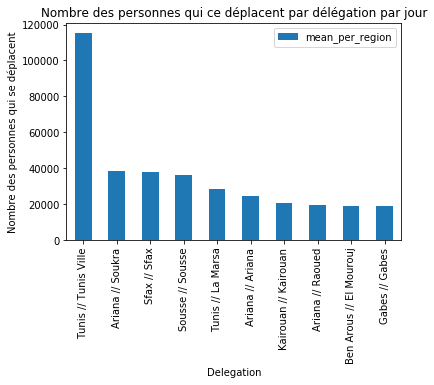

In [146]:
#Top 10 regions by number of people moving 
top.plot(kind='bar',x='start_name_stack',y='mean_per_region')
plt.title('Nombre des personnes qui ce déplacent par délégation par jour')
plt.xlabel('Delegation')
plt.ylabel('Nombre des personnes qui se déplacent')

C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


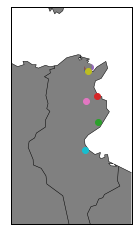

In [147]:
#Now we will try to plot these points on the Tunisian Map using the matplotlib library : basemap +using top dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


#Plotting the Tunisian Map with basemap
axs = plt.subplot(111)

m = Basemap(width=500000,height=900000,
            
            resolution='l',projection='lcc',
            lat_0=35.083956,lon_0=9.417980)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color="grey")
m.drawmapboundary()

#df = [{'lon': 9.5, 'lat': 35, 'site': 'point1'}, 
#{'lon': -16, 'lat': 46, 'site': 'point2'}]


#Plotting the points on the map 
for ind in top.index: 
    #print(top1['start_x'][ind], top1['start_y'][ind])
    x, y = m(top['start_x'][ind], top['start_y'][ind])
    #axs.annotate(top1['start_polygon_names'][ind], xy=(x, y),  xycoords='data',
                #xytext=(-40, 20), textcoords = 'offset points',
                #arrowprops=dict(arrowstyle="->"))
    axs.plot(x, y, marker='o')

plt.show()

Text(0, 0.5, 'Nombre des personnes qui se déplacent')

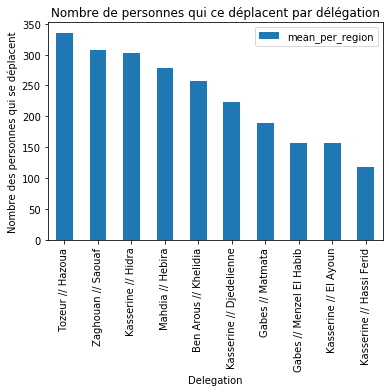

In [148]:
##Bottom 10 regions by number of people moving 
tail.plot(kind='bar',x='start_name_stack',y='mean_per_region')
plt.title('Nombre de personnes qui ce déplacent par délégation')
plt.xlabel('Delegation')
plt.ylabel('Nombre des personnes qui se déplacent')

C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


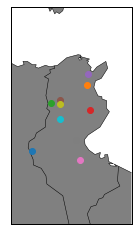

In [149]:
#Now we will try to plot these points on the Tunisian Map using the matplotlib library : basemap + using tail dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


#Plotting the Tunisian Map with basemap
axs = plt.subplot(111)

m = Basemap(width=500000,height=900000,
            
            resolution='l',projection='lcc',
            lat_0=35.083956,lon_0=9.417980)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color="grey")
m.drawmapboundary()

#df = [{'lon': 9.5, 'lat': 35, 'site': 'point1'}, 
#{'lon': -16, 'lat': 46, 'site': 'point2'}]


#Plotting the points on the map 
for ind in tail.index: 
    #print(top1['start_x'][ind], top1['start_y'][ind])
    x, y = m(tail['start_x'][ind], tail['start_y'][ind])
    #axs.annotate(top1['start_polygon_names'][ind], xy=(x, y),  xycoords='data',
                #xytext=(-40, 20), textcoords = 'offset points',
                #arrowprops=dict(arrowstyle="->"))
    axs.plot(x, y, marker='o')

plt.show()


<font size="6">Borders with Libya  : </font>

In [150]:
#To work with borders of libya we will take two points on the tunisian map and set them as the border 

C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


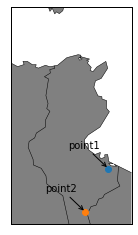

In [151]:
#Plotting the Tunisian Map with basemap
axs = plt.subplot(111)

m = Basemap(width=500000,height=900000,
            
            resolution='l',projection='lcc',
            lat_0=35.083956,lon_0=9.417980)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color="grey")
m.drawmapboundary()

#Point1: lon=11.071485  , lat=33.100745
#Point2:'lon': 10.038081, 'lat': 31.5

libya_borders = [{'lon': 11.071485 , 'lat': 33.100745, 'site': 'point1'}, 
{'lon': 10.038081, 'lat': 31.5, 'site': 'point2'}]


#Plotting the points on the map 
for ind in libya_borders: 
    #print(top1['start_x'][ind], top1['start_y'][ind])
    x, y = m(ind['lon'], ind['lat'])
    axs.annotate(ind['site'], xy=(x, y),  xycoords='data',
                xytext=(-40, 20), textcoords = 'offset points',
                arrowprops=dict(arrowstyle="->"))
    axs.plot(x, y, marker='o')

plt.show()


In [152]:
#we are going to choose from the dataset only the points on Libya borders  
libya=trainsorted.copy()
libya['start_x']=trainsorted[trainsorted['start_x']>=10.038081] 
libya['start_y']=trainsorted[trainsorted['start_y']<=33.100745]
libya.dropna(inplace=True)
#start_x and end_x are the same , same goes for y 
libya.drop(['start_x','start_y'], axis=1,inplace=True)
libya.head()


,start_name_stack,mean_per_region,start_polygon_id,start_polygon_names,end_polygon_id,end_polygon_names,end_x,end_y,end_name_stack,length_km,metric_name,tile_size,distance
6120,Tataouine // Tataouine,6919.0,962379,Tataouine,962379,Tataouine,10.498354,32.723963,Tataouine // Tataouine,0.035326,n_crisis,13,0.0
3510,Medenine // Ben Guerdane,6621.3,962369,Ben Guerdane,962369,Ben Guerdane,11.206484,32.904727,Medenine // Ben Guerdane,0.049903,n_crisis,13,0.0
6030,Tataouine // Ghoumrassen,2372.4,962376,Ghoumrassen,962376,Ghoumrassen,10.242869,33.049298,Tataouine // Ghoumrassen,0.030767,n_crisis,13,0.0
6090,Tataouine // Smâr,893.9,962380,Smâr,962380,Smâr,10.968862,32.769897,Tataouine // Smâr,0.066155,n_crisis,13,0.0
6000,Tataouine // Dehiba,413.1,962377,Dehiba,962377,Dehiba,10.416188,31.901739,Tataouine // Dehiba,0.000000,n_crisis,13,0.0


In [153]:
libya.shape

(5, 13)

Text(0, 0.5, 'Nombre des personnes qui se déplacent')

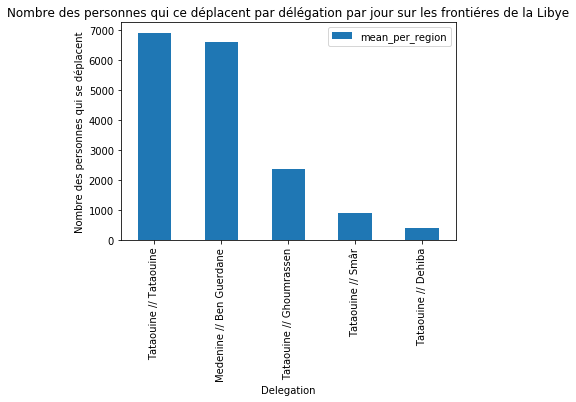

In [167]:
libya.plot(kind='bar',x='start_name_stack',y='mean_per_region')
plt.title('Nombre des personnes qui ce déplacent par délégation par jour sur les frontiéres de la Libye')
plt.xlabel('Delegation')
plt.ylabel('Nombre des personnes qui se déplacent')

C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


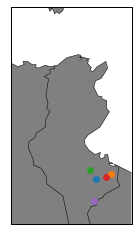

In [155]:
#Plotting the Tunisian Map with basemap
axs = plt.subplot(111)

m = Basemap(width=500000,height=900000,
            
            resolution='l',projection='lcc',
            lat_0=35.083956,lon_0=9.417980)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color="grey")
m.drawmapboundary()

#df = [{'lon': 9.5, 'lat': 35, 'site': 'point1'}, 
#{'lon': -16, 'lat': 46, 'site': 'point2'}]


#Plotting the points on the map 
for ind in libya.index: 
    #print(top1['start_x'][ind], top1['start_y'][ind])
    x, y = m(libya['end_x'][ind], libya['end_y'][ind])
    #axs.annotate(top1['start_polygon_names'][ind], xy=(x, y),  xycoords='data',
                #xytext=(-40, 20), textcoords = 'offset points',
                #arrowprops=dict(arrowstyle="->"))
    axs.plot(x, y, marker='o')

plt.show()

<font size="6">Borders with Algeria  : </font>

C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


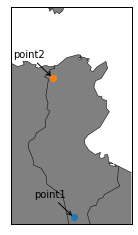

In [156]:
#Plotting the Tunisian Map with basemap
axs = plt.subplot(111)

m = Basemap(width=500000,height=900000,
            
            resolution='l',projection='lcc',
            lat_0=35.083956,lon_0=9.417980)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color="grey")
m.drawmapboundary()
#Plotting borders points
#Point1: lon=9.532372  , lat=30.977609
#Point2:'lon': 8.564798, 'lat': 36.491973

alg_borders = [{'lon': 9.532372 , 'lat': 31.3, 'site': 'point1'}, 
{'lon': 8.564798, 'lat': 36.491973, 'site': 'point2'}]


#Plotting the points on the map 
for ind in alg_borders: 
    #print(top1['start_x'][ind], top1['start_y'][ind])
    x, y = m(ind['lon'], ind['lat'])
    axs.annotate(ind['site'], xy=(x, y),  xycoords='data',
                xytext=(-40, 20), textcoords = 'offset points',
                arrowprops=dict(arrowstyle="->"))
    axs.plot(x, y, marker='o')

plt.show()

In [164]:
#we are going to choose from the dataset only the points on Algeria borders  
alg=trainsorted.copy()
alg['start_x']=trainsorted[trainsorted['start_x']<=9.532372] 
alg['start_y']=trainsorted[trainsorted['start_y']<=36.491973]
alg.dropna(inplace=True)
#start_x and end_x are the same , same goes for y 
alg.drop(['start_x','start_y'], axis=1,inplace=True)
algtop=alg.head(10)
algtop

,start_name_stack,mean_per_region,start_polygon_id,start_polygon_names,end_polygon_id,end_polygon_names,end_x,end_y,end_name_stack,length_km,metric_name,tile_size,distance
1770,Gafsa // Gafsa,15369.0,962381,Gafsa,962381,Gafsa,8.774885,34.491587,Gafsa // Gafsa,0.017282,n_crisis,13,0.0
2730,Kasserine // Kasserine,8235.3,962337,Kasserine,962337,Kasserine,8.770275,35.118047,Kasserine // Kasserine,0.006057,n_crisis,13,0.0
5250,Sidi Bouzid // Sidi Bouzid,7822.5,962348,Sidi Bouzid,962348,Sidi Bouzid,9.530089,35.059948,Sidi Bouzid // Sidi Bouzid,0.034949,n_crisis,13,0.0
1200,El Kef // Dahmani,6338.1,962265,Dahmani,962265,Dahmani,8.765410,36.005923,El Kef // Dahmani,0.061454,n_crisis,13,0.0
6270,Tozeur // Tozeur,5756.6,962390,Tozeur,962390,Tozeur,8.106848,33.893048,Tozeur // Tozeur,0.019779,n_crisis,13,0.0
2940,Kebili // Kebili,5635.6,962395,Kebili,962395,Kebili,9.083859,33.684676,Kebili // Kebili,0.040162,n_crisis,13,0.0
2880,Kebili // Douz,4337.1,962396,Douz,962396,Douz,9.337845,33.106657,Kebili // Douz,0.014231,n_crisis,13,0.0
5580,Siliana // Siliana,3998.3,962267,Siliana,962267,Siliana,9.351369,36.012256,Siliana // Siliana,0.062286,n_crisis,13,0.0
1860,Gafsa // Metlaoui,3777.5,962384,Metlaoui,962384,Metlaoui,8.383902,34.230873,Gafsa // Metlaoui,0.034694,n_crisis,13,0.0
2790,Kasserine // Sbeitla,3109.4,962338,Sbeitla,962338,Sbeitla,9.076868,35.257677,Kasserine // Sbeitla,0.011004,n_crisis,13,0.0


Text(0, 0.5, 'Nombre des personnes qui se déplacent')

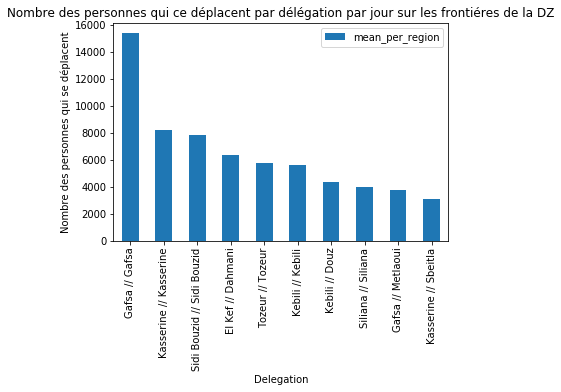

In [169]:
algtop.plot(kind='bar',x='start_name_stack',y='mean_per_region')
plt.title('Nombre des personnes qui ce déplacent par délégation par jour sur les frontiéres de la DZ')
plt.xlabel('Delegation')
plt.ylabel('Nombre des personnes qui se déplacent')

C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\asus\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


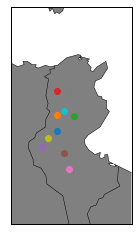

In [170]:
#Plotting the Tunisian Map with basemap
axs = plt.subplot(111)

m = Basemap(width=500000,height=900000,
            
            resolution='l',projection='lcc',
            lat_0=35.083956,lon_0=9.417980)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color="grey")
m.drawmapboundary()

#df = [{'lon': 9.5, 'lat': 35, 'site': 'point1'}, 
#{'lon': -16, 'lat': 46, 'site': 'point2'}]


#Plotting the points on the map 
for ind in algtop.index: 
    #print(top1['start_x'][ind], top1['start_y'][ind])
    x, y = m(algtop['end_x'][ind], algtop['end_y'][ind])
    #axs.annotate(top1['start_polygon_names'][ind], xy=(x, y),  xycoords='data',
                #xytext=(-40, 20), textcoords = 'offset points',
                #arrowprops=dict(arrowstyle="->"))
    axs.plot(x, y, marker='o')

plt.show()